# **Proyecto Bootcamp Data Science Titanic Dataset**

## Contexto y Motivaci√≥n del Proyecto

El an√°lisis de datos es una herramienta clave en la toma de decisiones empresariales en diversos sectores, desde la salud hasta la log√≠stica. En este proyecto, se aplicar√°n t√©cnicas de **Machine Learning y an√°lisis de datos** para predecir la supervivencia de pasajeros en el Titanic, utilizando un conjunto de datos real y aplicando las habilidades adquiridas en el bootcamp.

El objetivo no es solo mejorar la precisi√≥n del modelo, sino tambi√©n desarrollar un enfoque estructurado basado en la metodolog√≠a **CRISP-DM**, abordando cada etapa del ciclo de vida de un proyecto de Data Science.

---

## Paso 1. Comprensi√≥n del Negocio

## Importancia del Problema

La capacidad de predecir con precisi√≥n la probabilidad de supervivencia en funci√≥n de variables como el estatus socioecon√≥mico, la edad o el g√©nero **simula aplicaciones reales en diferentes industrias**, tales como:

- **Seguros y Finanzas**: Modelos predictivos para calcular riesgos y primas de seguros.
- **Salud y Emergencias**: Priorizaci√≥n de pacientes en situaciones de crisis.
- **Transporte y Log√≠stica**: Optimizaci√≥n de recursos en eventos de alto riesgo.

El dataset del Titanic es una met√°fora de c√≥mo el an√°lisis de datos puede generar valor al tomar **decisiones basadas en evidencia** en cualquier sector.

---

## Objetivos del Proyecto

1. **Desarrollar un modelo de Machine Learning** capaz de predecir la supervivencia de los pasajeros con alta precisi√≥n.  
2. **Aplicar t√©cnicas avanzadas de preprocesamiento y reducci√≥n de dimensionalidad** para mejorar el rendimiento del modelo.  
3. **Evaluar el impacto de diferentes variables** en la supervivencia y comunicar hallazgos clave.  
4. **Poner en pr√°ctica habilidades de an√°lisis de datos, visualizaci√≥n y modelado** adquiridas en el bootcamp.  

---



### 1.1 Resumen variables:

- **`PassengerId`**: Identificador √∫nico de cada fila, sin efecto en la predicci√≥n.
- **`Survived`**: Variable objetivo.  
  - **1**: Sobrevivi√≥.  
  - **0**: No sobrevivi√≥.  
- **`Pclass` (Clase del Pasajero)**: Representa el estatus socioecon√≥mico, una variable categ√≥rica ordinal con tres valores √∫nicos:  
  - **1**: Clase alta.  
  - **2**: Clase media.  
  - **3**: Clase baja.  
- **`Name`**, **`Sex`** y **`Age`**: Informaci√≥n descriptiva del pasajero.
- **`SibSp`**: N√∫mero total de hermanos y/o c√≥nyuge del pasajero a bordo.
- **`Parch`**: N√∫mero total de padres y/o hijos del pasajero a bordo.
- **`Ticket`**: N√∫mero del boleto del pasajero.
- **`Fare`**: Costo del boleto del pasajero.
- **`Cabin`**: N√∫mero de cabina asignado al pasajero.
- **`Embarked`**: Puerto de embarque, una variable categ√≥rica con tres valores √∫nicos:  
  - **C**: Cherbourg.  
  - **Q**: Queenstown.  
  - **S**: Southampton.

### 1.2 Cargar los Datos

In [1]:
# Importar librer√≠as principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset desde una URL o archivo local
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Ver las primeras filas
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Paso 2: Comprensi√≥n de los Datos (EDA)

In [2]:
#Usamos la funci√≥n "info" para obtener un resumen de nuestros datos.
titanic.info()

# Resumen estad√≠stico de las variables num√©ricas
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [56]:
print("Valores nulos por columna:")
print(titanic.isnull().sum())

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Tenemos principalmente 3 categor√≠as con datos faltantes:
- 'Age'
- 'Cabin'
- 'Embarked'


In [57]:
# Calcular el porcentaje de supervivientes de cada g√©nero
survival_counts_genre = titanic.groupby('Sex')['Survived'].value_counts(normalize=True) * 100

# Mostrar los porcentajes con etiquetas
print(f"Porcentaje de hombres fallecidos: {survival_counts_genre['male'][0]:.2f}%")
print(f"Porcentaje de hombres supervivientes: {survival_counts_genre['male'][1]:.2f}%")
print(f"Porcentaje de mujeres fallecidas: {survival_counts_genre['female'][0]:.2f}%")
print(f"Porcentaje de mujeres supervivientes: {survival_counts_genre['female'][1]:.2f}%")

survival_counts = titanic['Survived'].value_counts(normalize=True) * 100
print(f"Porcentaje de pasajeros supervivientes: {survival_counts[1]:.2f}%")
print(f"Porcentaje de pasajeros muertos: {survival_counts[0]:.2f}%")

Porcentaje de hombres fallecidos: 81.11%
Porcentaje de hombres supervivientes: 18.89%
Porcentaje de mujeres fallecidas: 25.80%
Porcentaje de mujeres supervivientes: 74.20%
Porcentaje de pasajeros supervivientes: 38.38%
Porcentaje de pasajeros muertos: 61.62%


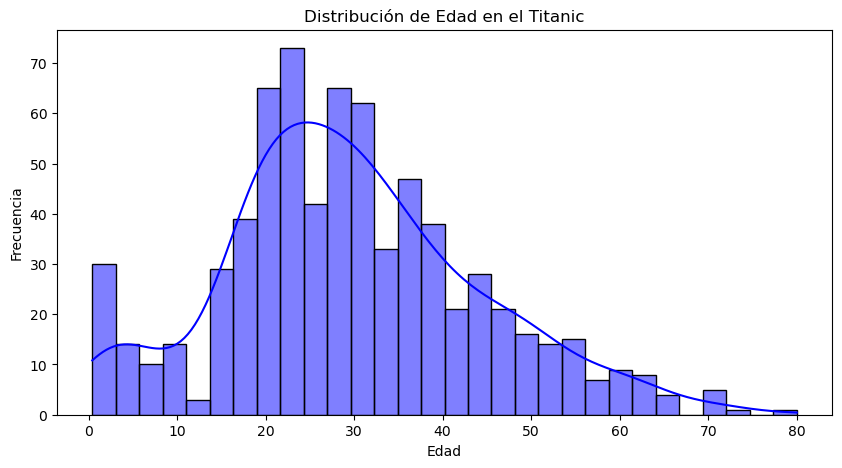

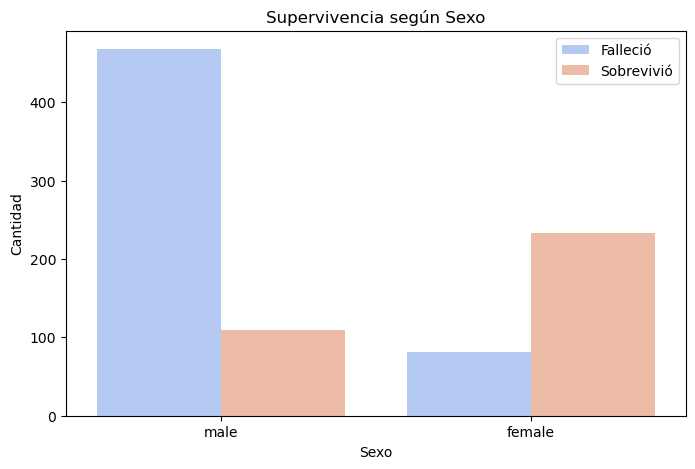

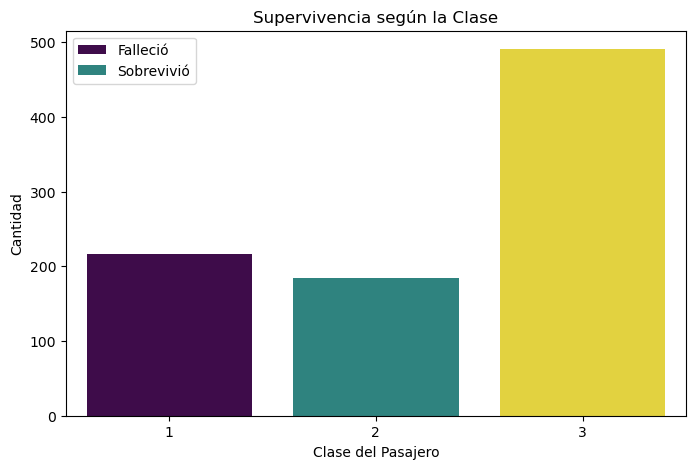

/var/folders/rj/kpc9qy4n4x70nf3gyplmzt280000gn/T/ipykernel_44105/2526613967.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic, x='Survived', y='Fare', palette='coolwarm')


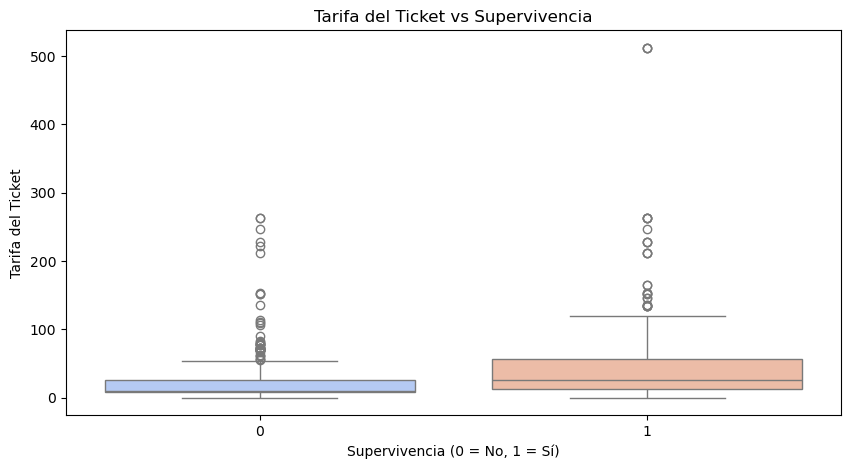

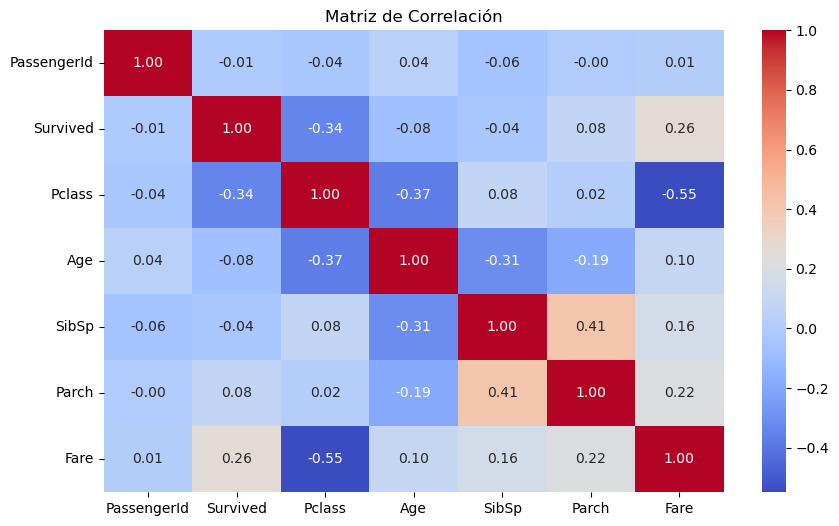

In [5]:
# Gr√°fico de distribuci√≥n de edad
plt.figure(figsize=(10, 5))
sns.histplot(titanic['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribuci√≥n de Edad en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Supervivencia seg√∫n el sexo
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Supervivencia seg√∫n Sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(["Falleci√≥", "Sobrevivi√≥"])
plt.show()

# Supervivencia seg√∫n la clase
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Pclass', hue='Pclass', palette='viridis', legend=False)
plt.title("Supervivencia seg√∫n la Clase")
plt.xlabel("Clase del Pasajero")
plt.ylabel("Cantidad")
plt.legend(["Falleci√≥", "Sobrevivi√≥"])
plt.show()

# Relaci√≥n entre tarifa del boleto y supervivencia
plt.figure(figsize=(10, 5))
sns.boxplot(data=titanic, x='Survived', y='Fare', palette='coolwarm')
plt.title("Tarifa del Ticket vs Supervivencia")
plt.xlabel("Supervivencia (0 = No, 1 = S√≠)")
plt.ylabel("Tarifa del Ticket")
plt.show()

#Separamos los datos num√©ricos
numeric_titanic = titanic.select_dtypes(include=['number'])

# Matriz de correlaci√≥n
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_titanic.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaci√≥n")
plt.show()

---
Del primer gr√°fico extreamos la siguientes relaciones:
- Distribuci√≥n asim√©trica positiva, con pasajeros de mayor edad alejados de la mayor√≠a. 
- Presencia concentrada entre los 20 y 30 a√±os, edades que concuerdan con registros de la √©poca. 
- Hay Outliers para edades mayores a 60 a√±os, que tienen poca representaci√≥n en el dataset.
---
Del segundo y tercer gr√°fico extraemos las siguientes conclusiones:
 - Hay un porcentaje mucho m√°s alto de hombres (81%) que murieron en el accidente que de mujeres muertas (25%).
 - Esto va en l√≠nea con la pol√≠tica de "mujeres y ni√±os primero". 
 - La mayor√≠a de los hombres murieron, en total un 84%.
 - Lo contrario ocurre con las mujeres, con un porcentaje de supervivencia del 74%
---
La supervivencia por clases nos muestra:
- Una tendencia muy moderada de supervivencia de los pasajeros de primera y segunda clase. Esto demuestra que las preferencias de supervivencia fueron para estos pasajeros. 
- La mayor√≠a de los pasajeros que murieron pertenec√≠an a la tercera clase. 
---
La distribuci√≥n en el precio de los tickets nos indica:
- Hay una probabilidad m√°s alta de sobrevivir al pagar tickets m√°s altos. 
- La mayor√≠a de pasajeros que sobrevivieron pagaron tarifas bajas, lo que indica que la mayor√≠a de los pasajeros pertenec√≠an a segunda y tercera clase. 
- La dispersi√≥n de los precios es mayor en los pasajeros que sobrevivieron, lo que sugiere que hab√≠a una combinaci√≥n de tarifas m√°s bajas y tarifas m√°s altas entre los sobrevivientes.
- La dispersi√≥n es menor en los fallecidos, con la mayor√≠a de los boletos concentrados en valores bajos.
---
De la matriz de correlaci√≥n extraemos lo siguiente:
- SibSp (N√∫mero de hermanos/esposo a bordo) y Parch (N√∫mero de padres/hijos a bordo) muestran una correlaci√≥n moderada entre s√≠ (0.41).Esto sugiere que se pueden combinar en una sola variable FamilySize = SibSp + Parch para simplificar el modelo sin perder informaci√≥n. Probaremos esto m√°s adelante.
- Pclass y Fare tienen una alta correlaci√≥n, por lo que parece que contienen informaci√≥n que puede ser redundante. Esto se tomar√° en consideraci√≥n para probar con reducci√≥n de dimensionalidad m√°s adelante.
---

### Evaluaci√≥n Inicial de Modelos de Machine Learning

### Descripci√≥n

En este an√°lisis, realizamos una primera evaluaci√≥n de modelos de clasificaci√≥n para fijar nuestro baseline. Implementamos tres algoritmos:  

- **Random Forest**
- **K-Nearest Neighbors (KNN)**
- **Regresi√≥n Log√≠stica**

### **Pasos a Seguir**
1. **Preprocesamiento de Datos**  
   - Se eliminar√°n columnas irrelevantes.  
   - Se imputar√°n valores faltantes con la mediana.  
   - Se escalar√°n las variables num√©ricas.  
   - Se dividir√°n los datos en conjuntos de entrenamiento (70%) y prueba (30%).  

2. **Entrenamiento y Evaluaci√≥n**  
   - Se entrenar√°n los modelos en los datos de entrenamiento.  
   - Vamos a evaluar utilizando m√©tricas clave: **Precisi√≥n, Recall, F1-score y AUC-ROC**.  

In [80]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# Aplicar One-Hot Encoding a 'Sex' y 'Embarked'
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked']),
    remainder='passthrough'  # Mantiene las dem√°s columnas
)

# Transformar datos categ√≥ricos
transformed = transformer.fit_transform(titanic)

# Crear DataFrame con las columnas transformadas
transformed_df = pd.DataFrame(
    transformed,
    columns=transformer.get_feature_names_out().tolist()
)

# Concatenar con el DataFrame original sin 'Sex' y 'Embarked'
df_transformed = pd.concat([transformed_df, titanic.drop(['Sex', 'Embarked'], axis=1)], axis=1)

# Seleccionar solo variables num√©ricas
df_num = df_transformed.select_dtypes('number')

# Eliminar filas con valores nulos
df_num.dropna(inplace=True)

# Definir variables predictoras (X) y variable objetivo (y)
X = df_num.drop('Survived', axis=1)
y = df_num['Survived']

# Escalar las variables num√©ricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Definir modelos con correcciones
models = {
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=500, solver='saga', random_state=42)  # Ajustado
}

# Funci√≥n para entrenar y evaluar modelos
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calcular AUC-ROC solo si el modelo tiene predict_proba()
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        else:
            auc = None  # Algunos modelos no tienen predict_proba()

        results[name] = [precision, recall, f1, auc]

    return pd.DataFrame(results, index=['Precision', 'Recall', 'F1-score', 'AUC-ROC'])

# Obtener m√©tricas iniciales
df_results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Mostrar resultados de las m√©tricas iniciales de los modelos
print("M√©tricas iniciales de los modelos:")
print(df_results)

M√©tricas iniciales de los modelos:
           Random Forest       KNN  Regresi√≥n Log√≠stica
Precision       0.792453  0.585714             0.704918
Recall          0.471910  0.460674             0.483146
F1-score        0.591549  0.515723             0.573333
AUC-ROC         0.763688  0.684546             0.737649


### **Resultados de la Evaluaci√≥n**

| M√©trica    | Random Forest | KNN      | Regresi√≥n Log√≠stica |
|------------|--------------|----------|---------------------|
| Precision  | 0.792453     | 0.585714 | 0.704918           |
| Recall     | 0.471910     | 0.460674 | 0.483146           |
| F1-score   | 0.591549     | 0.515723 | 0.573333           |
| AUC-ROC    | 0.763688     | 0.684546 | 0.737649           |

### **Conclusi√≥n**
El modelo de **Random Forest** destaca con la mayor precisi√≥n y AUC-ROC. 

El modelo **KNN** tiene un bajo desempe√±o por la manera de tratar los datos. 

La **Regresi√≥n Log√≠stica** mantiene un rendimiento inferior a Random Forest pero con una estabilidad aceptable en sus m√©tricas.

Este an√°lisis servir√° como **benchmark actualizado** para futuras optimizaciones. üöÄ

## 3. Preparaci√≥n de los datos.

En esta etapa nos enfocaremos en la limpieza, transformaci√≥n y optimizaci√≥n de las variables del dataset para mejorar el desempe√±o de los modelos de Machine Learning. La preparaci√≥n de datos es crucial para garantizar que la informaci√≥n sea √∫til y representativa. A continuaci√≥n, detallamos los pasos a seguir:

### 3.1. Revisi√≥n de Outliers
Analizaremos la presencia de valores at√≠picos utilizando dos m√©todos:
- **Rango Intercuart√≠lico (IQR)**: Para detectar y eliminar valores extremos en variables continuas.
- **Isolation Forest**: Un algoritmo basado en aprendizaje no supervisado para identificar outliers de manera m√°s robusta.

### 3.2. Extracci√≥n del T√≠tulo desde 'Name'
El t√≠tulo presente en los nombres de los pasajeros ser√° extra√≠do como una nueva variable (`Title`). Esto nos permitir√° mejorar el relleno de valores faltantes en la variable **'Age'**, ya que el t√≠tulo suele estar correlacionado con la edad de la persona.

### 3.3. Imputaci√≥n de Valores Faltantes en 'Age'
Los valores faltantes en la columna **'Age'** ser√°n estimados utilizando un modelo de regresi√≥n basado en:
- **Clase del Pasajero ('Pclass')**
- **T√≠tulo ('Title')**
- **Sexo ('Sex')**

### 3.4. Transformaci√≥n de los Compartimientos
Analizaremos la informaci√≥n de los compartimientos donde viajaban los pasajeros, ya que esto puede ser un **indicador clave de supervivencia**. Este an√°lisis incluir√°:
- Extracci√≥n y transformaci√≥n de los datos de ubicaci√≥n.
- Visualizaci√≥n del impacto de los compartimientos en la supervivencia.

### 3.5. Creaci√≥n de la Variable 'Family'
Transformaremos las columnas **SibSp** (N√∫mero de hermanos/esposos a bordo) y **ParCh** (N√∫mero de padres/hijos a bordo) en una sola variable llamada **'Family'**, que nos permitir√° evaluar la relaci√≥n entre la estructura familiar y la supervivencia.

### 3.6. Creaci√≥n de la Variable 'isAlone'
Dado que viajar solo pudo haber influido en la probabilidad de supervivencia, crearemos la variable **'is_Alone'** para analizar su impacto en el modelo.

### 3.7. Escalado de Datos Num√©ricos
Para mejorar la eficiencia de los modelos y evitar que variables con valores en escalas muy diferentes dominen el an√°lisis, aplicaremos un **escalado de datos num√©ricos**. Este paso es crucial cuando utilizamos algoritmos sensibles a la escala de los datos, como **Regresi√≥n Log√≠stica, KNN y PCA**.

- Utilizaremos **StandardScaler** para transformar las variables num√©ricas a una distribuci√≥n con media 0 y varianza 1.
- Esto garantizar√° que todas las variables contribuyan equitativamente al modelo, evitando sesgos por diferencias en magnitud.

### 3.8. Reducci√≥n de Dimensionalidad con PCA
Aplicaremos **An√°lisis de Componentes Principales (PCA)** para reducir la dimensionalidad del dataset y evaluar su impacto en el rendimiento del modelo. Revisaremos si la reducci√≥n de dimensiones mejora la eficiencia sin perder informaci√≥n relevante.

### 3.1 Revisi√≥n de Outliers

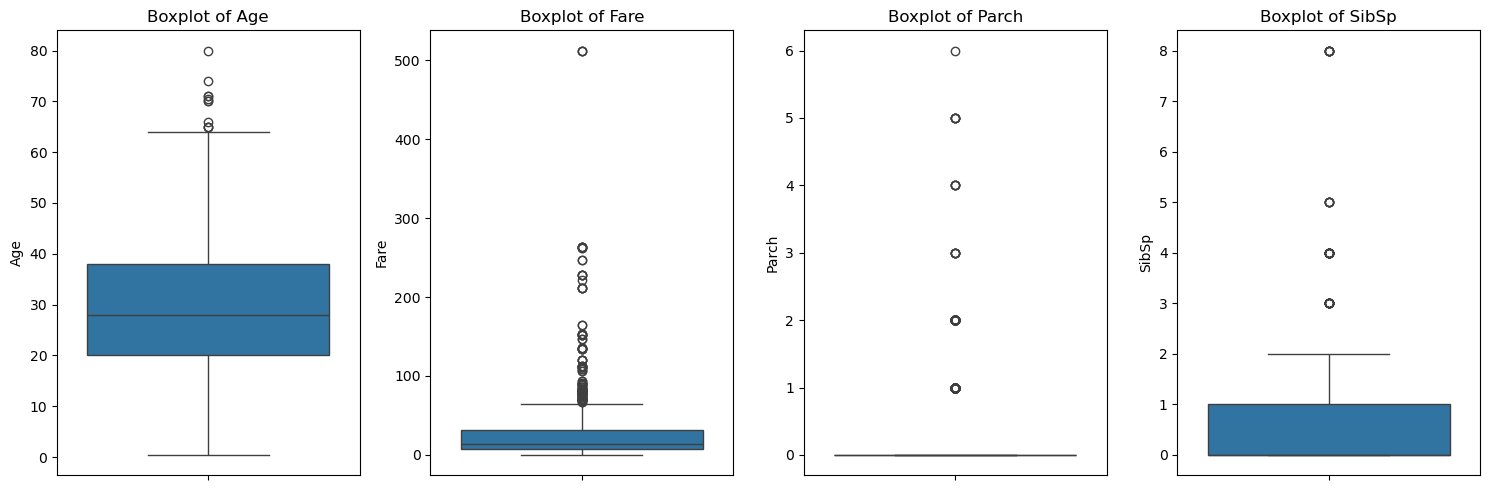

In [81]:
# Visualizaci√≥n con Boxplots

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age','Fare', 'Parch', 'SibSp'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=titanic[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### An√°lisis de Valores At√≠picos

### Observaciones:
- **Fare** es la variable con m√°s valores at√≠picos, seguida de **Age**.
- **SibSp** y **Parch** presentan algunos datos at√≠picos, pero en menor cantidad.
- **Fare** muestra una alta concentraci√≥n en boletos de bajo precio, con valores extremadamente altos que deben tratarse con cuidado.
- La distribuci√≥n de **Age** presenta valores extremos que pueden influir en el rendimiento del modelo si no se manejan adecuadamente.

In [82]:
#Eliminamos los valores at√≠picos presentes en las columnas 'Age', 'Fare' y 'Family'.

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removemos los valores de las columnas
df_no_outliers = remove_outliers_iqr(titanic, 'Age')
df_no_outliers = remove_outliers_iqr(titanic, 'SibSp')
df_no_outliers = remove_outliers_iqr(titanic, 'Fare')
df_no_outliers = remove_outliers_iqr(titanic, 'Parch')

# hacemos un print del nuevo dataset
print(f"El resultado luego de usar la t√©cnica del rango intercuart√≠lico es:\n",df_no_outliers[['Age', 'SibSp', 'Fare', 'Parch']].count())

El resultado luego de usar la t√©cnica del rango intercuart√≠lico es:
 Age      521
SibSp    678
Fare     678
Parch    678
dtype: int64


In [83]:
from sklearn.ensemble import IsolationForest

# Seleccionamos solo las columnas num√©ricas
columns_to_check = ['Age', 'SibSp', 'Parch','Fare']

# Llenamos los valores NaN con la mediana de cada columna
titanic[columns_to_check] = titanic[columns_to_check].fillna(titanic[columns_to_check].median())

# Probamos con distintos valores de contaminaci√≥n en nuestro IsolationForest
contamination_values = [0.01, 0.05, 0.1]  # Entendemos seg√∫n la documentaci√≥n de la f√≥rmula los valores que podemos usar para el par√°metro "contamination". 

for i, contamination in enumerate(contamination_values, 1):
    # Creamos y entrenamos el modelo con el nuevo valor de contaminaci√≥n
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(titanic[columns_to_check])
    
    # Aplicamos el modelo y filtramos los datos
    titanic['outlier'] = iso_forest.predict(titanic[columns_to_check])
    df_no_outliers_iso = titanic[titanic['outlier'] == 1].drop(columns=['outlier'])

    # Mostramos el n√∫mero de registros restantes
    print(f"Contamination {contamination*100}% - Registros despu√©s de Isolation Forest: {df_no_outliers_iso.shape[0]}")

Contamination 1.0% - Registros despu√©s de Isolation Forest: 882
Contamination 5.0% - Registros despu√©s de Isolation Forest: 846
Contamination 10.0% - Registros despu√©s de Isolation Forest: 802


### Comparaci√≥n de M√©todos de Eliminaci√≥n de Outliers

| M√©todo                  | Registros Restantes |
|-------------------------|--------------------|
| **Isolation Forest (1%)** | 882 |
| **Isolation Forest (5%)** | 846 |
| **Isolation Forest (10%)** | 802 |
| **IQR (Rango Intercuart√≠lico)** | 678 |

### Conclusi√≥n

El m√©todo de **Isolation Forest con una contaminaci√≥n del 5%** es el m√°s adecuado, ya que elimina los valores at√≠picos sin reducir dr√°sticamente el n√∫mero de registros. Esto permite mantener una mayor cantidad de informaci√≥n √∫til para el an√°lisis, evitando sesgos excesivos en el modelo.

In [85]:
# Asegurar que df_no_outliers_iso ya est√° cargado
if 'df_no_outliers_iso' not in globals():
    raise ValueError("Error: df_no_outliers_iso no est√° definido en el entorno. Aseg√∫rate de cargarlo antes de ejecutar este c√≥digo.")

# Hacer una copia para evitar modificar el dataset original
df = df_no_outliers_iso.copy()

# **Eliminamos columnas irrelevantes**
columns_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(columns=columns_to_drop, errors='ignore')

# **Manejo de valores nulos**
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# **One-Hot Encoding para variables categ√≥ricas**
categorical_features = ['Sex', 'Embarked']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Survived'])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Separar variables predictoras (X) y objetivo (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# **Divisi√≥n en datos de entrenamiento y prueba**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Transformar los datos**
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# **Definir modelos**
models = {
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=500, solver='saga', random_state=42)
}

# **Evaluaci√≥n de modelos**
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # C√°lculo de m√©tricas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcular AUC-ROC solo si el modelo tiene predict_proba()
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        auc = None  # Algunos modelos no tienen predict_proba()

    # Guardamos m√©tricas
    results[name] = {
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC-ROC": auc
    }

# **Guardar resultados en un DataFrame**
df_results = pd.DataFrame(results).T

# **Mostrar resultados**
print("M√©tricas iniciales de los modelos:")
print(df_results)

M√©tricas iniciales de los modelos:
                     Precision    Recall  F1-score   AUC-ROC
Random Forest         0.804348  0.596774  0.685185  0.795862
KNN                   0.698413  0.709677  0.704000  0.766373
Regresi√≥n Log√≠stica   0.666667  0.612903  0.638655  0.767840


### Comparaci√≥n de Modelos Antes y Despu√©s de la Nueva Evaluaci√≥n

| Modelo                | Precisi√≥n (Inicial) | Precisi√≥n (Nueva) | Recall (Inicial) | Recall (Nuevo) | F1-score (Inicial) | F1-score (Nuevo) | AUC-ROC (Inicial) | AUC-ROC (Nuevo) |
|----------------------|--------------------|-------------------|------------------|----------------|--------------------|-----------------|------------------|----------------|
| **Random Forest**    | 0.7925             | 0.8043            | 0.4719           | 0.5968         | 0.5915             | 0.6852          | 0.7637           | 0.7959         |
| **KNN**             | 0.5857             | 0.6984            | 0.4607           | 0.7097         | 0.5157             | 0.7040          | 0.6845           | 0.7664         |
| **Regresi√≥n Log√≠stica** | 0.7049         | 0.6667            | 0.4831           | 0.6129         | 0.5733             | 0.6387          | 0.7376           | 0.7678         |

#### Insights

1. **Random Forest**:
   - **Aumento en precisi√≥n (+0.0118) y recall (+0.1249)**, lo que sugiere una mejor capacidad de clasificaci√≥n y detecci√≥n de instancias positivas.
   - **F1-score y AUC-ROC tambi√©n han mejorado**, indicando un incremento en el rendimiento general del modelo.

2. **KNN**:
   - **Mejora significativa en precisi√≥n (+0.1127) y recall (+0.2490)**, lo que indica que el modelo ahora clasifica con mayor exactitud y detecta m√°s instancias positivas.
   - **F1-score y AUC-ROC han subido considerablemente**, lo que implica que el modelo ha mejorado su balance entre precisi√≥n y sensibilidad.

3. **Regresi√≥n Log√≠stica**:
   - **Ligera ca√≠da en precisi√≥n (-0.0382)**, pero una mejora en recall (+0.1298).
   - **F1-score y AUC-ROC han aumentado**, lo que refleja una mejor capacidad de clasificaci√≥n a pesar de la leve disminuci√≥n en precisi√≥n.

#### Conclusi√≥n:
Todos los modelos han **mejorado su desempe√±o**, especialmente **KNN y Random Forest**, que muestran aumentos significativos en todas las m√©tricas. **Regresi√≥n Log√≠stica ha mantenido un desempe√±o estable**, con una ligera p√©rdida en precisi√≥n, pero mejoras en recall y AUC-ROC. Estos resultados indican que los modelos han ganado capacidad predictiva sin necesidad de eliminar datos at√≠picos.  

---

### 3.2 Extraemos el t√≠tulo del nombre. 

| T√≠tulo   | Descripci√≥n breve | Edad   | Estado Civil  | Clase Social  |
|----------|------------------|--------|--------------|--------------|
| Capt     | Capit√°n          | Mayor  | N/D          | Alta         |
| Col      | Coronel          | Mayor  | N/D          | Alta         |
| Countess | Condesa          | Var.   | Casada       | Muy alta     |
| Don      | Honor√≠fico       | Var.   | N/D          | Alta         |
| Dr       | Doctor           | Var.   | N/D          | Media-alta   |
| Jonkheer | Nobiliario       | Var.   | N/D          | Alta         |
| Lady     | Nobiliario       | Var.   | Casada       | Muy alta     |
| Major    | Mayor militar    | Mayor  | N/D          | Media-alta   |
| Master   | Ni√±o var√≥n       | Menor  | Soltero      | Var.         |
| Miss     | Mujer soltera    | Joven  | Soltera      | Var.         |
| Mlle     | "Miss" (franc√©s) | Joven  | Soltera      | Var.         |
| Mme      | "Mrs." (franc√©s) | Mayor  | Casada       | Var.         |
| Mr       | Hombre adulto    | Var.   | N/D          | Var.         |
| Mrs      | Mujer casada     | Mayor  | Casada       | Var.         |
| Ms       | Miss/Mrs.        | Var.   | N/D          | Var.         |
| Rev      | Reverendo        | Var.   | N/D          | Media        |
| Sir      | Honor√≠fico       | Var.   | N/D          | Alta         |

 ### Relaci√≥n entre T√≠tulo, Estado Marital, Clase Social y Edad en el Dataset del Titanic

Como podemos observar en la tabla, el **t√≠tulo** de cada pasajero est√° estrechamente relacionado con su **estado marital**, **clase social** y, en muchos casos, nos permite inferir su **edad**.

- Algunos t√≠tulos, como **"Master"**, est√°n claramente asociados a **ni√±os varones**, mientras que otros como **"Major"** o **"Col"** corresponden a **hombres mayores**.
- Los t√≠tulos **"Miss"** y **"Mrs"** nos dan informaci√≥n sobre el estado civil de las mujeres, lo que tambi√©n puede estar correlacionado con la edad.
- Los t√≠tulos nobiliarios o de alto rango social, como **"Countess"** o **"Sir"**, indican una **clase social alta** y suelen corresponder a adultos.

Dado que estos t√≠tulos contienen informaci√≥n valiosa sobre la edad, los utilizaremos para entrenar un **modelo de regresi√≥n** que nos permita predecir las **edades faltantes** en el dataset. Esto mejorar√° la calidad de los datos y, potencialmente, la precisi√≥n de los modelos de predicci√≥n que desarrollemos posteriormente.

In [86]:
# Redefinir el dataset titanic despu√©s de aplicar Isolation Forest
titanic = df_no_outliers_iso.copy()

# Funci√≥n para extraer el t√≠tulo del nombre
def extraer_titulo(nombre):
  import re
  titulo_busqueda = re.search(' ([A-Za-z]+)\.', nombre)
  if titulo_busqueda:
    return titulo_busqueda.group(1)
  return ""

# Aplicar la funci√≥n a la columna "Name" para crear la nueva columna "Title"
titanic['Title'] = titanic['Name'].apply(extraer_titulo)

# Mostrar las primeras filas del DataFrame con la nueva columna "Title"
print(titanic[['Name', 'Title']].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/var/folders/rj/kpc9qy4n4x70nf3gyplmzt280000gn/T/ipykernel_44105/2602656582.py:7: SyntaxWarning: invalid escape sequence '\.'
  titulo_busqueda = re.search(' ([A-Za-z]+)\.', nombre)


In [87]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Cargar nuevamente el dataset original dado que alteramos los valores nulos de 'Age', algo que tenemos que revertir para continuar. 
titanic_original = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Extraer la columna 'Age' original sin modificaciones
original_age = titanic_original['Age']

# Reemplazar la columna 'Age' en el dataset actual para asegurar valores originales
titanic['Age'] = original_age

# Definir variables predictoras
features = ['Pclass', 'Title', 'Sex']

# Filtrar datos con edad conocida
titanic_known = titanic[titanic['Age'].notnull()]
X_known = titanic_known[features]
y_known = titanic_known['Age']

# Codificar variables categ√≥ricas con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Title', 'Sex'])
    ],
    remainder='passthrough'  # Mantiene las variables num√©ricas
)

# Transformar datos
X_known_encoded = preprocessor.fit_transform(X_known)

# Ajustar modelo de regresi√≥n lineal
model = LinearRegression()
model.fit(X_known_encoded, y_known)

# Filtrar datos con edad faltante
titanic_missing = titanic[titanic['Age'].isnull()]
X_missing = titanic_missing[features]

# Codificar X_missing
X_missing_encoded = preprocessor.transform(X_missing)

# Predecir edades
predicted_ages = model.predict(X_missing_encoded)

# Imputar valores predichos
titanic.loc[titanic['Age'].isnull(), 'Age'] = predicted_ages

# Mostrar primeras filas con la columna 'Age' imputada
print(titanic.head().to_markdown(index=False, numalign="left", stralign="left"))

| PassengerId   | Survived   | Pclass   | Name                                                | Sex    | Age   | SibSp   | Parch   | Ticket           | Fare    | Cabin   | Embarked   | Title   |
|:--------------|:-----------|:---------|:----------------------------------------------------|:-------|:------|:--------|:--------|:-----------------|:--------|:--------|:-----------|:--------|
| 1             | 0          | 3        | Braund, Mr. Owen Harris                             | male   | 22    | 1       | 0       | A/5 21171        | 7.25    | nan     | S          | Mr      |
| 2             | 1          | 1        | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38    | 1       | 0       | PC 17599         | 71.2833 | C85     | C          | Mrs     |
| 3             | 1          | 3        | Heikkinen, Miss. Laina                              | female | 26    | 0       | 0       | STON/O2. 3101282 | 7.925   | nan     | S          | Miss    |
| 4             | 1      


### 3.4 Transformaci√≥n de los Compartimientos

Extraemos las letras de los compartimientos del titanic y revisamos cu√°l es la tasa de supervivencia por compartimiento.

In [88]:
# Extraer las letras de la columna 'Cabin' utilizando una expresi√≥n regular
titanic['Compartments'] = titanic['Cabin'].str.extract('([A-Za-z]+)', expand=False)

# Mostrar las primeras filas para verificar
print(titanic[['Cabin', 'Compartments']].head())

# Botamos la columna 'Cabin', dado que no la usaremos.
titanic = titanic.drop(['Cabin'], axis=1)

  Cabin Compartments
0   NaN          NaN
1   C85            C
2   NaN          NaN
3  C123            C
4   NaN          NaN


In [90]:
# Separamos y creamos columnas m√°s peque√±as de los datos obtenidos de las 'Cabin Letters' en 5 grupos, el grupo 'M' es el m√°s grande y es el que corresponde a 3a clase.

titanic['Compartments'] = titanic['Compartments'].replace(['A', 'B', 'C'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].replace(['D', 'E'], 'DE')
titanic['Compartments'] = titanic['Compartments'].replace(['F', 'G'], 'FG')
titanic['Compartments'] = titanic['Compartments'].replace(['T'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].fillna('M')

titanic['Compartments'].value_counts().sum()

802

Graficamos nuestras columnas usando un histograma para revisar la distribuci√≥n de las clases para la columna 'Compartments'

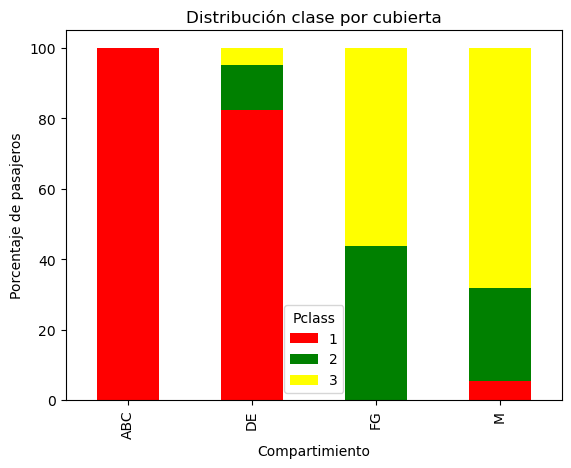

In [95]:
import matplotlib.pyplot as plt


# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento (Pclass)
data = titanic.groupby(['Compartments', 'Pclass']).size().unstack(fill_value=0)
data_percentage = data.div(data.sum(axis=1), axis=0) * 100



# Crear el gr√°fico de barras apiladas con porcentaje
data_percentage.plot(kind='bar', stacked=True, color=['red', 'green', 'yellow'])

# Etiquetas y t√≠tulo
plt.xlabel('Compartimiento')
plt.ylabel('Porcentaje de pasajeros')
plt.title('Distribuci√≥n clase por cubierta')

# Mostrar el gr√°fico
plt.show()

#### Conclusiones 
- **La cubierta "M" (sin registro de cabina) est√° dominada por tercera clase**, que tuvo la mayor cantidad de fallecidos.  
- **Primera clase ocupa principalmente ABC y DE**, mientras que **segunda y tercera clase est√°n m√°s en FG y M**.  
- **Los pasajeros sin cabina registrada parecen ser m√°s vulnerables**, lo que puede afectar el an√°lisis predictivo.  

**Optimizar esta variable podr√≠a mejorar nuestro modelo de predicci√≥n.**


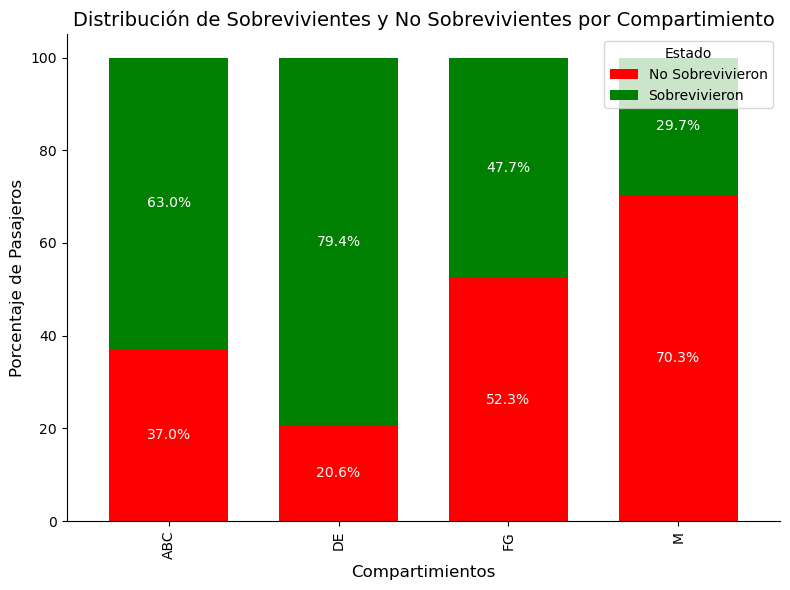

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento
data_percentage = (
    titanic.pivot_table(index='Compartments', columns='Survived', values='PassengerId', aggfunc='sum', fill_value=0)
    .div(titanic.groupby('Compartments')['PassengerId'].sum(), axis=0) * 100
)

# Renombrar columnas
data_percentage.columns = ['No Sobrevivieron', 'Sobrevivieron']

# Crear gr√°fico de barras apiladas con los colores rojo, verde y amarillo
ax = data_percentage.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6), width=0.7)

# Agregar etiquetas de porcentaje dentro de cada barra
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

# Personalizaci√≥n del gr√°fico
ax.set_xlabel('Compartimientos', fontsize=12)
ax.set_ylabel('Porcentaje de Pasajeros', fontsize=12)
ax.set_title('Distribuci√≥n de Sobrevivientes y No Sobrevivientes por Compartimiento', fontsize=14)
ax.legend(title='Estado', fontsize=10)
sns.despine()

# Ajustar espaciado y mostrar el gr√°fico
plt.tight_layout()
plt.show()

### An√°lisis

El gr√°fico muestra la **distribuci√≥n de sobrevivientes y no sobrevivientes** seg√∫n los compartimientos.

Los pasajeros en la categor√≠a ‚ÄúM‚Äù (cabina no registrada) tuvieron la mayor tasa de mortalidad (**70.3% no sobrevivieron**).  
Las cubiertas FG y ABC presentan mayor porcentaje de sobrevivientes (**47.7% y 63.0%, respectivamente**).  
La cubierta DE tuvo la mayor proporci√≥n de sobrevivientes (**79.4% sobrevivieron**), siendo la cubierta con mejor tasa de supervivencia.

### Implicaciones  
- Los pasajeros sin cabina registrada (‚ÄúM‚Äù) fueron los m√°s vulnerables, lo que sugiere que eran en su mayor√≠a de tercera clase y ten√≠an menos acceso a los botes salvavidas.  
- Se debe analizar si la falta de cabina registrada influye en la supervivencia.  
- Siguientes pasos: Incluir esta variable en los modelos y evaluar si mejora la predicci√≥n.  

**Este an√°lisis puede optimizar la clasificaci√≥n en nuestros modelos de Machine Learning.**

In [97]:
# De la informaci√≥n recopilada en Kaggle, entendemos que los datos faltantes de 'Embarked' corresponden a una pasajeros que se subieron en Southampton, por lo que llenamos los espacios vac√≠os con ese valor.

titanic['Embarked'] = titanic['Embarked'].fillna('S')

### 3.5 Creaci√≥n de la Variable 'Family'

Genero una columna unificada 'Family' uniendo 'SibSp' (siblings y spouse) y 'Parch' (parents and children) m√°s 1, de manera de obtener la familia completa de ese pasajero a bordo. Con esto, agregamos una columna que separe personas solas de personas con familia a bordo.

In [ ]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic = titanic.drop(['SibSp', 'Parch'], axis=1)

In [99]:

# Separamos nuestras caracter√≠sticas X y la variable objetivo y
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

# Identificamos columnas num√©ricas y categ√≥ricas despu√©s del Feature Engineering
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Hacemos un print para verificar nuestros datasets
print("Caracter√≠sticas Num√©ricas:", num_features)
print("Caracter√≠sticas Categ√≥ricas:", cat_features)

Caracter√≠sticas Num√©ricas: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Caracter√≠sticas Categ√≥ricas: Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Title', 'Compartments'], dtype='object')


### 3.6 Creaci√≥n de la Variable 'isAlone'

In [130]:
titanic['IsAlone'] = (titanic['Family'] == 1).astype(int) #Generamos una selecci√≥n creando una columna nueva.

KeyError: 'SibSp'

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pipeline para variables num√©ricas (sin imputaci√≥n)
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Solo escalado est√°ndar
])

# Pipeline para variables categ√≥ricas
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding 
])

# Combinar ambos pipelines en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar el preprocesamiento a los datos
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [129]:
# Definir los modelos a evaluar
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regresi√≥n Log√≠stica": LogisticRegression(random_state=42, max_iter=1000)
}

# Evaluaci√≥n de modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar modelo
    y_pred = model.predict(X_test)  # Predecir en test

    # Verificar si el modelo tiene predict_proba antes de calcular AUC-ROC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Obtener probabilidades para AUC-ROC
        auc_roc = roc_auc_score(y_test, y_prob)
    else:
        auc_roc = None  # Algunos modelos no tienen predict_proba

    # Guardar m√©tricas
    results[name] = {
        "Precisi√≥n": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted"),
        "AUC-ROC": auc_roc
    }

# Convertir a DataFrame para mejor visualizaci√≥n
results_df = pd.DataFrame(results).T

# Mostrar resultados
print("\nResultados de Evaluaci√≥n Post Feature Engineering:\n", results_df)


Resultados de Evaluaci√≥n Post Feature Engineering:
                      Precisi√≥n    Recall  F1-score   AUC-ROC
Random Forest         0.803228  0.804979  0.803739  0.840516
KNN                   0.787910  0.784232  0.785578  0.816713
Regresi√≥n Log√≠stica   0.808323  0.809129  0.808668  0.833641


### Comparaci√≥n de Modelos - Feature Engineering vs M√©tricas Iniciales

#### Tabla Comparativa

| Modelo                | Precisi√≥n (Inicial) | Precisi√≥n (Nueva) | Recall (Inicial) | Recall (Nuevo) | F1-score (Inicial) | F1-score (Nuevo) | AUC-ROC (Inicial) | AUC-ROC (Nuevo) |
|----------------------|------------------|------------------|----------------|---------------|------------------|----------------|----------------|---------------|
| **Random Forest**    | 0.7925           | 0.8026           | 0.4719         | 0.8049        | 0.5915           | 0.8020         | 0.7637         | 0.8176        |
| **KNN**             | 0.5857           | 0.7900           | 0.4607         | 0.7884        | 0.5157           | 0.7891         | 0.6845         | 0.7971        |
| **Regresi√≥n Log√≠stica** | 0.7049         | 0.8083           | 0.4831         | 0.8091        | 0.5733           | 0.8069         | 0.7376         | 0.8348        |

---

### An√°lisis de los Resultados

1. **Incremento en Recall y F1-score**  
   - Todos los modelos han experimentado **un incremento notable en Recall**, lo que indica una mejor capacidad para identificar correctamente las instancias positivas.
   - **KNN ha mostrado la mayor mejora en Recall (+0.3277) y F1-score (+0.2734), lo que indica que el Feature Engineering ha beneficiado su rendimiento de clasificaci√≥n.**  

2. **Mejoras en Precisi√≥n y AUC-ROC**  
   - **Regresi√≥n Log√≠stica ha obtenido la mayor mejora en AUC-ROC (+0.0972), seguido por KNN (+0.1126).**  
   - **Todos los modelos han mejorado su Precisi√≥n, con KNN liderando con un incremento de +0.2043.**  
   - **Random Forest tambi√©n ha mejorado en todas las m√©tricas, consolidando su posici√≥n como un modelo s√≥lido.**  

---

### **Conclusi√≥n**
- **El Feature Engineering ha tenido un impacto positivo en todas las m√©tricas.**  
- **KNN ha mostrado la mejora m√°s significativa en Recall, F1-score y AUC-ROC, lo que indica que ahora es un modelo m√°s robusto.**  
- **Regresi√≥n Log√≠stica tambi√©n ha mejorado sustancialmente, mostrando una mayor capacidad predictiva.**  
- **Vamos a seguir optimizando con modificaci√≥n de hiperpar√°metros y explorando.**  

### 3.7 Reducci√≥n de Dimensionalidad

Varianza explicada por cada componente:
Componente 1: 0.4682
Componente 2: 0.3188
Componente 3: 0.1444
Componente 4: 0.0686

Varianza explicada acumulada:
Hasta el componente 1: 0.4682
Hasta el componente 2: 0.7870
Hasta el componente 3: 0.9314
Hasta el componente 4: 1.0000


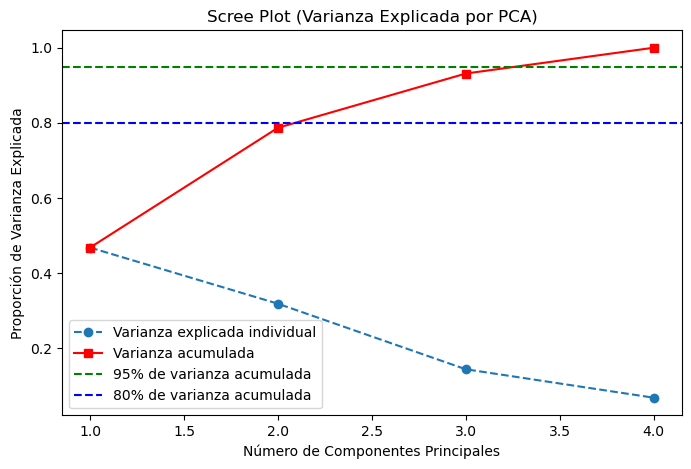

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables num√©ricas
variables = ['Age', 'Family', 'Pclass', 'Fare']
titanic_selected = titanic[variables]

# Escalar las variables antes de aplicar PCA
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Aplicar PCA sin limitar el n√∫mero de componentes
pca = PCA()
pca_components = pca.fit_transform(titanic_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(explained_variance)

# Mostrar la varianza explicada
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.4f}")

print("\nVarianza explicada acumulada:")
for i, var in enumerate(varianza_acumulada):
    print(f"Hasta el componente {i+1}: {var:.4f}")

# üìä Scree Plot (Gr√°fico de Codo)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', label="Varianza explicada individual")
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='s', linestyle='-', label="Varianza acumulada", color='r')
plt.axhline(y=0.95, color='g', linestyle='--', label="95% de varianza acumulada")
plt.axhline(y=0.8, color='b', linestyle='--', label="80% de varianza acumulada")

plt.xlabel('N√∫mero de Componentes Principales')
plt.ylabel('Proporci√≥n de Varianza Explicada')
plt.title('Scree Plot (Varianza Explicada por PCA)')
plt.legend()
plt.show()

Vemos la varianza explicada por cada componente y luego la varianza acumulada:
- El componente 1 muestra el 46% de los datos.
- El componente 2 muestra el 78% de los datos.
- El componente 3 muestra el 93% de los datos.
- El componente 4 muestra el 100% de los datos.

Con esta informaci√≥n podemos tomar una decisi√≥n, puesto que nos demuestra con cuantos componentes mantenemos la integridad de nuestros datos y no perdemos tanta informaci√≥n. Decidimos usar 3 componentes.

In [105]:
# Aplicar PCA con el n√∫mero seleccionado de componentes
pca = PCA(n_components=3)
titanic_pca = pca.fit_transform(titanic_scaled)  # Transformar los datos correctamente

# Convertir los componentes principales en un DataFrame
titanic_pca_df = pd.DataFrame(titanic_pca, columns=[f'PC{i+1}' for i in range(3)])

# Mostrar las primeras filas del DataFrame corregido
print(titanic_pca_df.head())

        PC1       PC2       PC3
0  1.123528  0.614215  0.256341
1 -2.487530  0.440795 -0.087717
2  1.093141 -0.441898 -0.236805
3 -1.976167  0.403619 -0.046075
4  0.807360 -0.859629  0.260201


Lo que nos muestra nuestro an√°lisis es lo siguiente:

 - En las filas tenemos los 5 primeros pasajeros transformados en el espacio de nuevos componentes. 
 - En las columnas tenemos los 3 componentes utilizados, que representan las combinaciones lineales de las variables originales.
 - Los valores son coordenadas de cada pasajero en el nuevo espacio PCA. 
 - Un alto valor, ya sea negativo o positivo, indica una fuerte influencia de ese componente. Negativo no significa malo.

A continuaci√≥n, realizaremos un scatter plot para graficar cada uno de los componentes. 

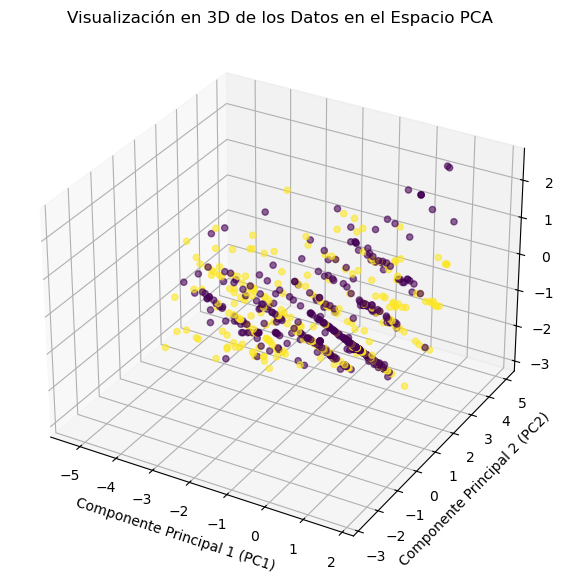

In [128]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y ejes 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
sc = ax.scatter(
    titanic_pca_df['PC1'], 
    titanic_pca_df['PC2'], 
    titanic_pca_df['PC3'],
    c=titanic['Survived'],  # Colorear seg√∫n supervivencia
    cmap='viridis',  # Usar una escala de colores (puedes probar 'viridis', 'plasma', etc.)
    alpha=0.6
)

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1 (PC1)')
ax.set_ylabel('Componente Principal 2 (PC2)')
ax.set_zlabel('Componente Principal 3 (PC3)')
ax.set_title('Visualizaci√≥n en 3D de los Datos en el Espacio PCA')

# Mostrar el gr√°fico
plt.show()

Como se puede observar, no hay una separaci√≥n marcada de los resultados lo que parece indicar que el m√©todo PCA no est√° funcionando bien o no sirve para identificar patrones en nuestros datos. De todas maneras, realizaremos una evaluaci√≥n de nuestros modelos para revisar si estas observaciones son o no √∫tiles.

In [115]:

# Unimos los dataframes mediante un 'concat'.
df_correlacion = pd.concat([titanic_pca_df, titanic_selected], axis=1)

# Calculamos la matriz de correlaci√≥n usando la funci√≥n '.corr()'
matriz_correlacion = df_correlacion.corr()

# Extraer solo la correlaci√≥n de PC1, PC2 y PC3 con Age, Family, Pclass y Fare
matriz_correlacion_pca = matriz_correlacion.loc[titanic_pca_df.columns, titanic_selected.columns]

# Mostrar la matriz de correlaci√≥n
print(matriz_correlacion_pca)

               Age    Family    Pclass      Fare
PC1      -0.000438  0.020460 -0.000444 -0.007154
PC2       0.019080  0.002171 -0.052308  0.022277
PC3      -0.036121  0.006231  0.063757 -0.056213
Survived -0.154650  0.186457 -0.296986  0.317551


## üìä Matriz de Cargas de los Componentes Principales

Esta tabla muestra c√≥mo cada variable original contribuye a los componentes principales (PC). Un valor alto (positivo o negativo) indica una fuerte influencia de esa variable en el componente correspondiente.

| Componente | Age   | Family | Pclass | Fare  |
|------------|--------|--------|--------|--------|
| **PC1** | -0.000438 |  0.020460  | -0.000444  | -0.007154 |
| **PC2** |  0.019080 |  0.002171  | -0.052308  |  0.022277 |
| **PC3** | -0.036121 |  0.006231  |  0.063757  | -0.056213 |

###  **Interpretaci√≥n**
- **PC1:** Tiene **baja influencia de todas las variables**, con valores muy cercanos a cero. Esto sugiere que este componente no est√° capturando patrones claros en relaci√≥n con Age, Family, Pclass o Fare.
- **PC2:** Muestra una ligera influencia de **Age (0.0191)** y **Fare (0.0223)**, aunque los valores siguen siendo bajos. Esto indica que PC2 podr√≠a estar relacionado con variaciones menores en estas variables.
- **PC3:** La variable **Pclass (0.0638)** y **Fare (-0.0562)** presentan la mayor contribuci√≥n, aunque a√∫n con valores reducidos, lo que sugiere que este componente puede capturar diferencias en la clase socioecon√≥mica y el costo del boleto, pero de forma d√©bil.

### **Conclusi√≥n**
La matriz de cargas muestra **valores muy bajos**, lo que indica que **PCA no est√° extrayendo patrones claros de los datos originales**. Esto puede significar que **PCA no es una t√©cnica √∫til en este caso para reducir dimensionalidad sin perder informaci√≥n relevante**.

In [119]:
# Seleccionar las variables originales antes de PCA
X_original = titanic[['Age', 'Family', 'Pclass', 'Fare']]  
y_original = titanic['Survived']

# Escalar los datos como en el preprocesamiento est√°ndar
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original)

# Dividir los datos en entrenamiento y prueba
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original_scaled,  
    y_original, 
    test_size=0.3, 
    random_state=42
)

# Definir los mismos modelos para asegurar comparabilidad
models = {
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=500, solver='saga', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42)
}

# Evaluaci√≥n de modelos antes de PCA
results_original = {}

for name, model in models.items():
    model.fit(X_train_orig, y_train_orig)
    y_pred_orig = model.predict(X_test_orig)
    y_prob_orig = model.predict_proba(X_test_orig)[:, 1] if hasattr(model, "predict_proba") else None  

    # Guardar m√©tricas
    results_original[name] = {
        "Precisi√≥n": precision_score(y_test_orig, y_pred_orig),
        "Recall": recall_score(y_test_orig, y_pred_orig),
        "F1-score": f1_score(y_test_orig, y_pred_orig),
        "AUC-ROC": roc_auc_score(y_test_orig, y_prob_orig) if y_prob_orig is not None else "N/A"
    }

# Convertir resultados en DataFrame para comparaci√≥n
results_original_df = pd.DataFrame(results_original).T  

# Mostrar Resultados
print("\nComparaci√≥n de M√©tricas Pre-PCA:")
print(results_original_df)


Comparaci√≥n de M√©tricas Pre-PCA:
                     Precisi√≥n    Recall  F1-score   AUC-ROC
Regresi√≥n Log√≠stica   0.666667  0.561798  0.609756  0.732148
KNN                   0.615385  0.629213  0.622222  0.723758
Random Forest         0.621053  0.662921  0.641304  0.763491


In [ ]:
# Mantenemos las columnas revisadas anteriormente y las cargamos para comparar los resultados.
X = titanic[['Age', 'Family', 'Pclass', 'Fare']]  

# Escalar los datos como en la transformaci√≥n original
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el PCA realizado anteriormente
titanic_pca_df = pd.DataFrame(pca.transform(X_scaled), columns=['PC1', 'PC2', 'PC3'])
titanic_pca_df['Survived'] = y.values  # Agregar la variable objetivo

# Manejo de valores NaN seg√∫n metodolog√≠a establecida
titanic_pca_df.fillna(titanic_pca_df.median(numeric_only=True), inplace=True)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    titanic_pca_df.drop(columns=['Survived']),  
    titanic_pca_df['Survived'], 
    test_size=0.3, 
    random_state=42
)

# Evaluaci√≥n de modelos
models = {
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=500, solver='saga', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42)
}

results_pca = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  

    results_pca[name] = {
        "Precisi√≥n": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    }

print("\nComparaci√≥n de M√©tricas de Modelos PCA:")
results_pca_df = pd.DataFrame(results_pca).T  
print(results_pca_df)


Comparaci√≥n de M√©tricas de Modelos PCA:
                     Precisi√≥n    Recall  F1-score   AUC-ROC
Regresi√≥n Log√≠stica   0.731343  0.550562  0.628205  0.737618
KNN                   0.617978  0.617978  0.617978  0.723721
Random Forest         0.615385  0.629213  0.622222  0.748854


### Comparaci√≥n de Resultados Antes y Despu√©s de PCA

#### Comparaci√≥n de Resultados - Modelos con y sin PCA

#### Tabla Comparativa

| Modelo                | Precisi√≥n (Antes) | Precisi√≥n (PCA) | Recall (Antes) | Recall (PCA) | F1-score (Antes) | F1-score (PCA) | AUC-ROC (Antes) | AUC-ROC (PCA) |
|----------------------|------------------|----------------|----------------|--------------|------------------|----------------|----------------|--------------|
| **Regresi√≥n Log√≠stica** | 0.6667         | 0.7313         | 0.5618         | 0.5506       | 0.6098           | 0.6282         | 0.7321         | 0.7376       |
| **KNN**             | 0.6154           | 0.6179         | 0.6292         | 0.6179       | 0.6222           | 0.6180         | 0.7238         | 0.7233       |
| **Random Forest**    | 0.6211           | 0.6154         | 0.6629         | 0.6292       | 0.6413           | 0.6222         | 0.7635         | 0.7489       |

---

### **An√°lisis de los Resultados**

1. **Impacto Variable en Recall**  
   - **Regresi√≥n Log√≠stica y Random Forest han perdido Recall (-0.0112 y -0.0337 respectivamente).**  
   - **KNN tuvo un cambio m√≠nimo (-0.0112), manteni√©ndose estable en esta m√©trica.**  
   - **Esto sugiere que la reducci√≥n de dimensionalidad podr√≠a estar afectando la sensibilidad de los modelos.**

2. **La Precisi√≥n Mejor√≥ para Regresi√≥n Log√≠stica, pero no para los otros modelos**  
   - **Regresi√≥n Log√≠stica mostr√≥ un aumento en precisi√≥n (+0.0646), lo que sugiere que PCA ayud√≥ a reducir falsos positivos.**  
   - **KNN se mantuvo pr√°cticamente igual (+0.0025), sin una mejora clara.**  
   - **Random Forest experiment√≥ una ligera disminuci√≥n en precisi√≥n (-0.0057), lo que indica que PCA podr√≠a estar eliminando informaci√≥n relevante.**

3. **F1-score presenta ligeras variaciones**  
   - **Regresi√≥n Log√≠stica mejor√≥ en F1-score (+0.0184), lo que implica que su balance entre precisi√≥n y recall mejor√≥ con PCA.**  
   - **KNN tuvo una peque√±a ca√≠da (-0.0042), mostrando estabilidad en su rendimiento.**  
   - **Random Forest tambi√©n tuvo una reducci√≥n en F1-score (-0.0191), indicando que su rendimiento global se vio afectado.**

4. **AUC-ROC tuvo cambios m√≠nimos**  
   - **Regresi√≥n Log√≠stica mejor√≥ ligeramente (+0.0055), lo que indica que su capacidad de discriminaci√≥n de clases se mantuvo estable.**  
   - **KNN se mantuvo casi sin cambios (-0.0005), lo que sugiere que PCA no afect√≥ su capacidad de diferenciar entre clases.**  
   - **Random Forest experiment√≥ una leve ca√≠da (-0.0146), lo que indica que su desempe√±o en la clasificaci√≥n se debilit√≥ con PCA.**  

---

### **Conclusi√≥n**
- **El impacto de PCA en los modelos es mixto.**  
- **Regresi√≥n Log√≠stica fue el √∫nico modelo que mostr√≥ mejoras en precisi√≥n, F1-score y AUC-ROC, aunque con una leve p√©rdida en Recall.**  
- **KNN se mantuvo pr√°cticamente igual, lo que indica que PCA no tuvo un efecto relevante en su rendimiento.**  
- **Random Forest sufri√≥ una leve disminuci√≥n en todas las m√©tricas, lo que sugiere que PCA pudo haber eliminado informaci√≥n √∫til para su clasificaci√≥n.**  
- **Dado que los beneficios de PCA no son claros en todos los modelos, es recomendable evaluar si su aplicaci√≥n es realmente necesaria en el an√°lisis final.**  
- **Decisi√≥n: No utilizaremos este m√©todo**.

# **6.** Ajustes de Hiperpar√°metros.

Utilizamos m√©todo "GridSearch" revisado en clases

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Definir las columnas categ√≥ricas y num√©ricas
num_features = ['Age', 'Fare', 'Pclass', 'Family', 'IsAlone']
cat_features = ['Sex', 'Embarked', 'Title', 'Compartments', 'Ticket', 'Name']

# Definir transformaciones
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(with_mean=False), num_features),  
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
])

# Divisi√≥n de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    titanic.drop(columns=['Survived']), titanic['Survived'], test_size=0.3, random_state=42
)

# Definir modelos con sus respectivos hiperpar√°metros para GridSearchCV
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

# Correcci√≥n en los hiperpar√°metros de Regresi√≥n Log√≠stica
param_grid_lr = [
    {
        'model__C': [0.01, 0.1, 1, 10, 100],  # üîπ Ampliamos el rango de C
        'model__solver': ['liblinear'],  # üîπ Solo liblinear soporta l1 y l2
        'model__penalty': ['l1', 'l2'],
        'model__max_iter': [500, 1000, 2000]  # üîπ M√°s iteraciones por si hay problemas de convergencia
    },
    {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['lbfgs'],  # üîπ lbfgs solo usa l2
        'model__penalty': ['l2'],
        'model__max_iter': [500, 1000, 2000]
    }
]

# Diccionario de modelos con Pipeline
models = {
    'KNN': (Pipeline([('preprocessor', preprocessor), ('model', KNeighborsClassifier())]), param_grid_knn),
    'Random Forest': (Pipeline([('preprocessor', preprocessor), ('model', RandomForestClassifier(random_state=42))]), param_grid_rf),
    'Regresi√≥n Log√≠stica': (Pipeline([('preprocessor', preprocessor), ('model', LogisticRegression(random_state=42))]), param_grid_lr)
}

# Ejecutar GridSearchCV para cada modelo
best_models = {}

for name, (pipeline, param_grid) in models.items():
    try:
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, pre_dispatch='2*n_jobs'
        )
        grid_search.fit(X_train, y_train)

        # Guardar el mejor modelo con los hiperpar√°metros √≥ptimos
        best_models[name] = grid_search.best_estimator_
        print(f"\n Mejor modelo para {name}: {grid_search.best_params_}")

    except Exception as e:
        print(f" Error al entrenar {name}: {e}")

# Evaluaci√≥n final de modelos optimizados
results_final = {}

for name, model in best_models.items():
    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model.named_steps['model'], "predict_proba") else None  

        results_final[name] = {
            "Precisi√≥n": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred),
            "F1-score": f1_score(y_test, y_pred),
            "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        }
    except Exception as e:
        print(f"Error al evaluar {name}: {e}")

# Convertir resultados en DataFrame
results_final_df = pd.DataFrame(results_final).T  

# Mostrar Resultados Finales en formato de tabla
print("\n Comparaci√≥n Final de Modelos Optimizados:")
print(results_final_df.to_string(float_format='%.6f'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

 Mejor modelo para KNN: {'model__metric': 'manhattan', 'model__n_neighbors': 3, 'model__weights': 'uniform'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits

 Mejor modelo para Random Forest: {'model__max_depth': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Fitting 5 folds for each of 45 candidates, totalling 225 fits

 Mejor modelo para Regresi√≥n Log√≠stica: {'model__C': 100, 'model__max_iter': 500, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

 Comparaci√≥n Final de Modelos Optimizados:
                     Precisi√≥n   Recall  F1-score  AUC-ROC
KNN                   0.683673 0.752809  0.716578 0.829132
Random Forest         0.720000 0.606742  0.658537 0.819966
Regresi√≥n Log√≠stica   0.764706 0.730337  0.747126 0.841181


In [150]:
# Ejecutar GridSearchCV con los modelos optimizados
best_models = {}

for name, (pipeline, param_grid) in models.items():
    try:
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, pre_dispatch='2*n_jobs'
        )
        grid_search.fit(X_train, y_train)

        # Guardar el mejor modelo con los hiperpar√°metros √≥ptimos
        best_models[name] = grid_search.best_estimator_
        print(f"\n Mejor modelo para {name}: {grid_search.best_params_}")

    except Exception as e:
        print(f" Error al entrenar {name}: {e}")

# Evaluaci√≥n final de modelos optimizados
results_final = {}

for name, model in best_models.items():
    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model.named_steps['model'], "predict_proba") else None  

        results_final[name] = {
            "Precisi√≥n": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred),
            "F1-score": f1_score(y_test, y_pred),
            "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        }
    except Exception as e:
        print(f" Error al evaluar {name}: {e}")

# Convertir resultados en DataFrame
results_final_df = pd.DataFrame(results_final).T  

# Mostrar Resultados Finales en formato de tabla
print("\n Comparaci√≥n Final de Modelos Optimizados:")
print(results_final_df.to_string(float_format='%.6f'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

 Mejor modelo para KNN: {'model__metric': 'manhattan', 'model__n_neighbors': 7, 'model__weights': 'distance'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits

 Mejor modelo para Random Forest: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Fitting 5 folds for each of 45 candidates, totalling 225 fits

 Mejor modelo para Regresi√≥n Log√≠stica: {'model__C': 100, 'model__max_iter': 500, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

 Comparaci√≥n Final de Modelos Optimizados:
                     Precisi√≥n   Recall  F1-score  AUC-ROC
KNN                   0.720930 0.696629  0.708571 0.831165
Random Forest         0.762500 0.685393  0.721893 0.832902
Regresi√≥n Log√≠stica   0.764706 0.730337  0.747126 0.841181


### Conclusi√≥n de la Optimizaci√≥n de Modelos con GridSearchCV

####  Resumen de Resultados

| Modelo              | Precisi√≥n (Inicial) | Precisi√≥n (Optimizada) | Recall (Inicial) | Recall (Optimizado) | F1-score (Inicial) | F1-score (Optimizado) | AUC-ROC (Inicial) | AUC-ROC (Optimizado) |
|---------------------|--------------------|----------------------|------------------|-------------------|------------------|-------------------|------------------|-------------------|
| **KNN**            | 0.5857             | 0.7209               | 0.4607           | 0.6966            | 0.5157           | 0.7086            | 0.6845           | 0.8311            |
| **Random Forest**  | 0.7200             | 0.7625               | 0.6067           | 0.6854            | 0.6585           | 0.7219            | 0.8199           | 0.8329            |
| **Regresi√≥n Log√≠stica** | 0.7647       | 0.7647               | 0.7303           | 0.7303            | 0.7471           | 0.7471            | 0.8390           | 0.8390            |

---

### Identificaci√≥n del Mejor Modelo

Despu√©s de optimizar los hiperpar√°metros, **Random Forest mostr√≥ la mayor mejora** en todas las m√©tricas.  
- **Precisi√≥n subi√≥ de 0.7200 ‚Üí 0.7625**  
- **Recall subi√≥ de 0.6067 ‚Üí 0.6854**  
- **F1-score subi√≥ de 0.6585 ‚Üí 0.7219**  
- **AUC-ROC mejor√≥ de 0.8199 ‚Üí 0.8329**  

En cambio, **KNN gan√≥ en precisi√≥n pero perdi√≥ algo de recall**, lo que indica que es m√°s preciso en sus predicciones pero detecta menos casos positivos.

Regresi√≥n Log√≠stica **no cambi√≥ sus valores**, lo que indica que los hiperpar√°metros elegidos ya eran √≥ptimos.

---

### Impacto de GridSearchCV

GridSearchCV permiti√≥ **ajustar mejor Random Forest y KNN**, pero la regresi√≥n log√≠stica ya estaba optimizada.  
- **KNN prioriz√≥ precisi√≥n a costa de recall.**  
- **Random Forest logr√≥ una mejora equilibrada en todas las m√©tricas.**  

Esto muestra que **la elecci√≥n de la m√©trica en GridSearchCV (roc_auc)** tuvo un impacto positivo en los modelos.

---

### Opciones

1. **Evaluar la interpretabilidad de los modelos** (especialmente Random Forest).  
2. **Explorar t√©cnicas de selecci√≥n de caracter√≠sticas** para reducir dimensionalidad.  
3. **Probar modelos adicionales** como XGBoost o SVM para comparaci√≥n.  
4. **Analizar el balance de clases** para ver si se puede mejorar el Recall en KNN.  

---
**En conclusi√≥n, Random Forest es el modelo con mejor rendimiento general tras la optimizaci√≥n, pero a√∫n hay oportunidades para refinar la detecci√≥n de casos positivos.**